# Preparing the Data for Structure Learning


In [3]:
import pandas as pd
import warnings
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE


data = pd.read_csv('preprocess_mars_express/MarsExpressPower/marsexpress_dataset.csv', delimiter=',')
data.head(5)

ut_ms  NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
0  2008-08-22 00:00:00  0.133582  0.001552  0.175436  0.657240  0.000747   
1  2008-08-22 01:00:00  0.217001  0.001498  0.175888  0.854918  0.000717   
2  2008-08-22 02:00:00  0.155922  0.001503  0.175389  1.079016  0.000719   
3  2008-08-22 03:00:00  0.081440  0.001532  0.175324  0.720677  0.000742   
4  2008-08-22 04:00:00  0.103773  0.001505  0.174224  0.828578  0.000738   

   NPWD2472  NPWD2481  NPWD2482  NPWD2491  ...  SEQ  SSS  SXX  TMB  TTT  VVV  \
0  0.000661  0.000585  0.001927  0.244648  ...  1.0  0.0  0.0  0.0  0.0  0.0   
1  0.000628  0.000551  0.001834  0.230870  ...  0.0  0.0  0.0  0.0  2.0  0.0   
2  0.000636  0.000568  0.001856  0.202746  ...  0.0  0.0  0.0  0.0  2.0  0.0   
3  0.000647  0.000570  0.001892  0.212218  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000642  0.000560  0.001879  0.228923  ...  0.0  0.0  0.0  0.0  0.0  0.0   

   XXX  ACF  DMC  DMF  
0  3.0  0.0  0.0  0.0  
1  1.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  2.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  

[5 rows x 60 columns]

In [4]:

from causalnex.structure.notears import from_pandas
sm = from_pandas(data.drop(["ut_ms"], axis=1), max_iter=900)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [13]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

node_attributes = {
    node: {
        "fontsize": 18,
        "labelloc": "t",
        "fontcolor": "red"
    }
    for node in sm.nodes
}



# Customising edges
edge_attributes = {
    (u, v): {
        "color": "white"
    }
    for u, v, w in sm.edges(data="weight")
}


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


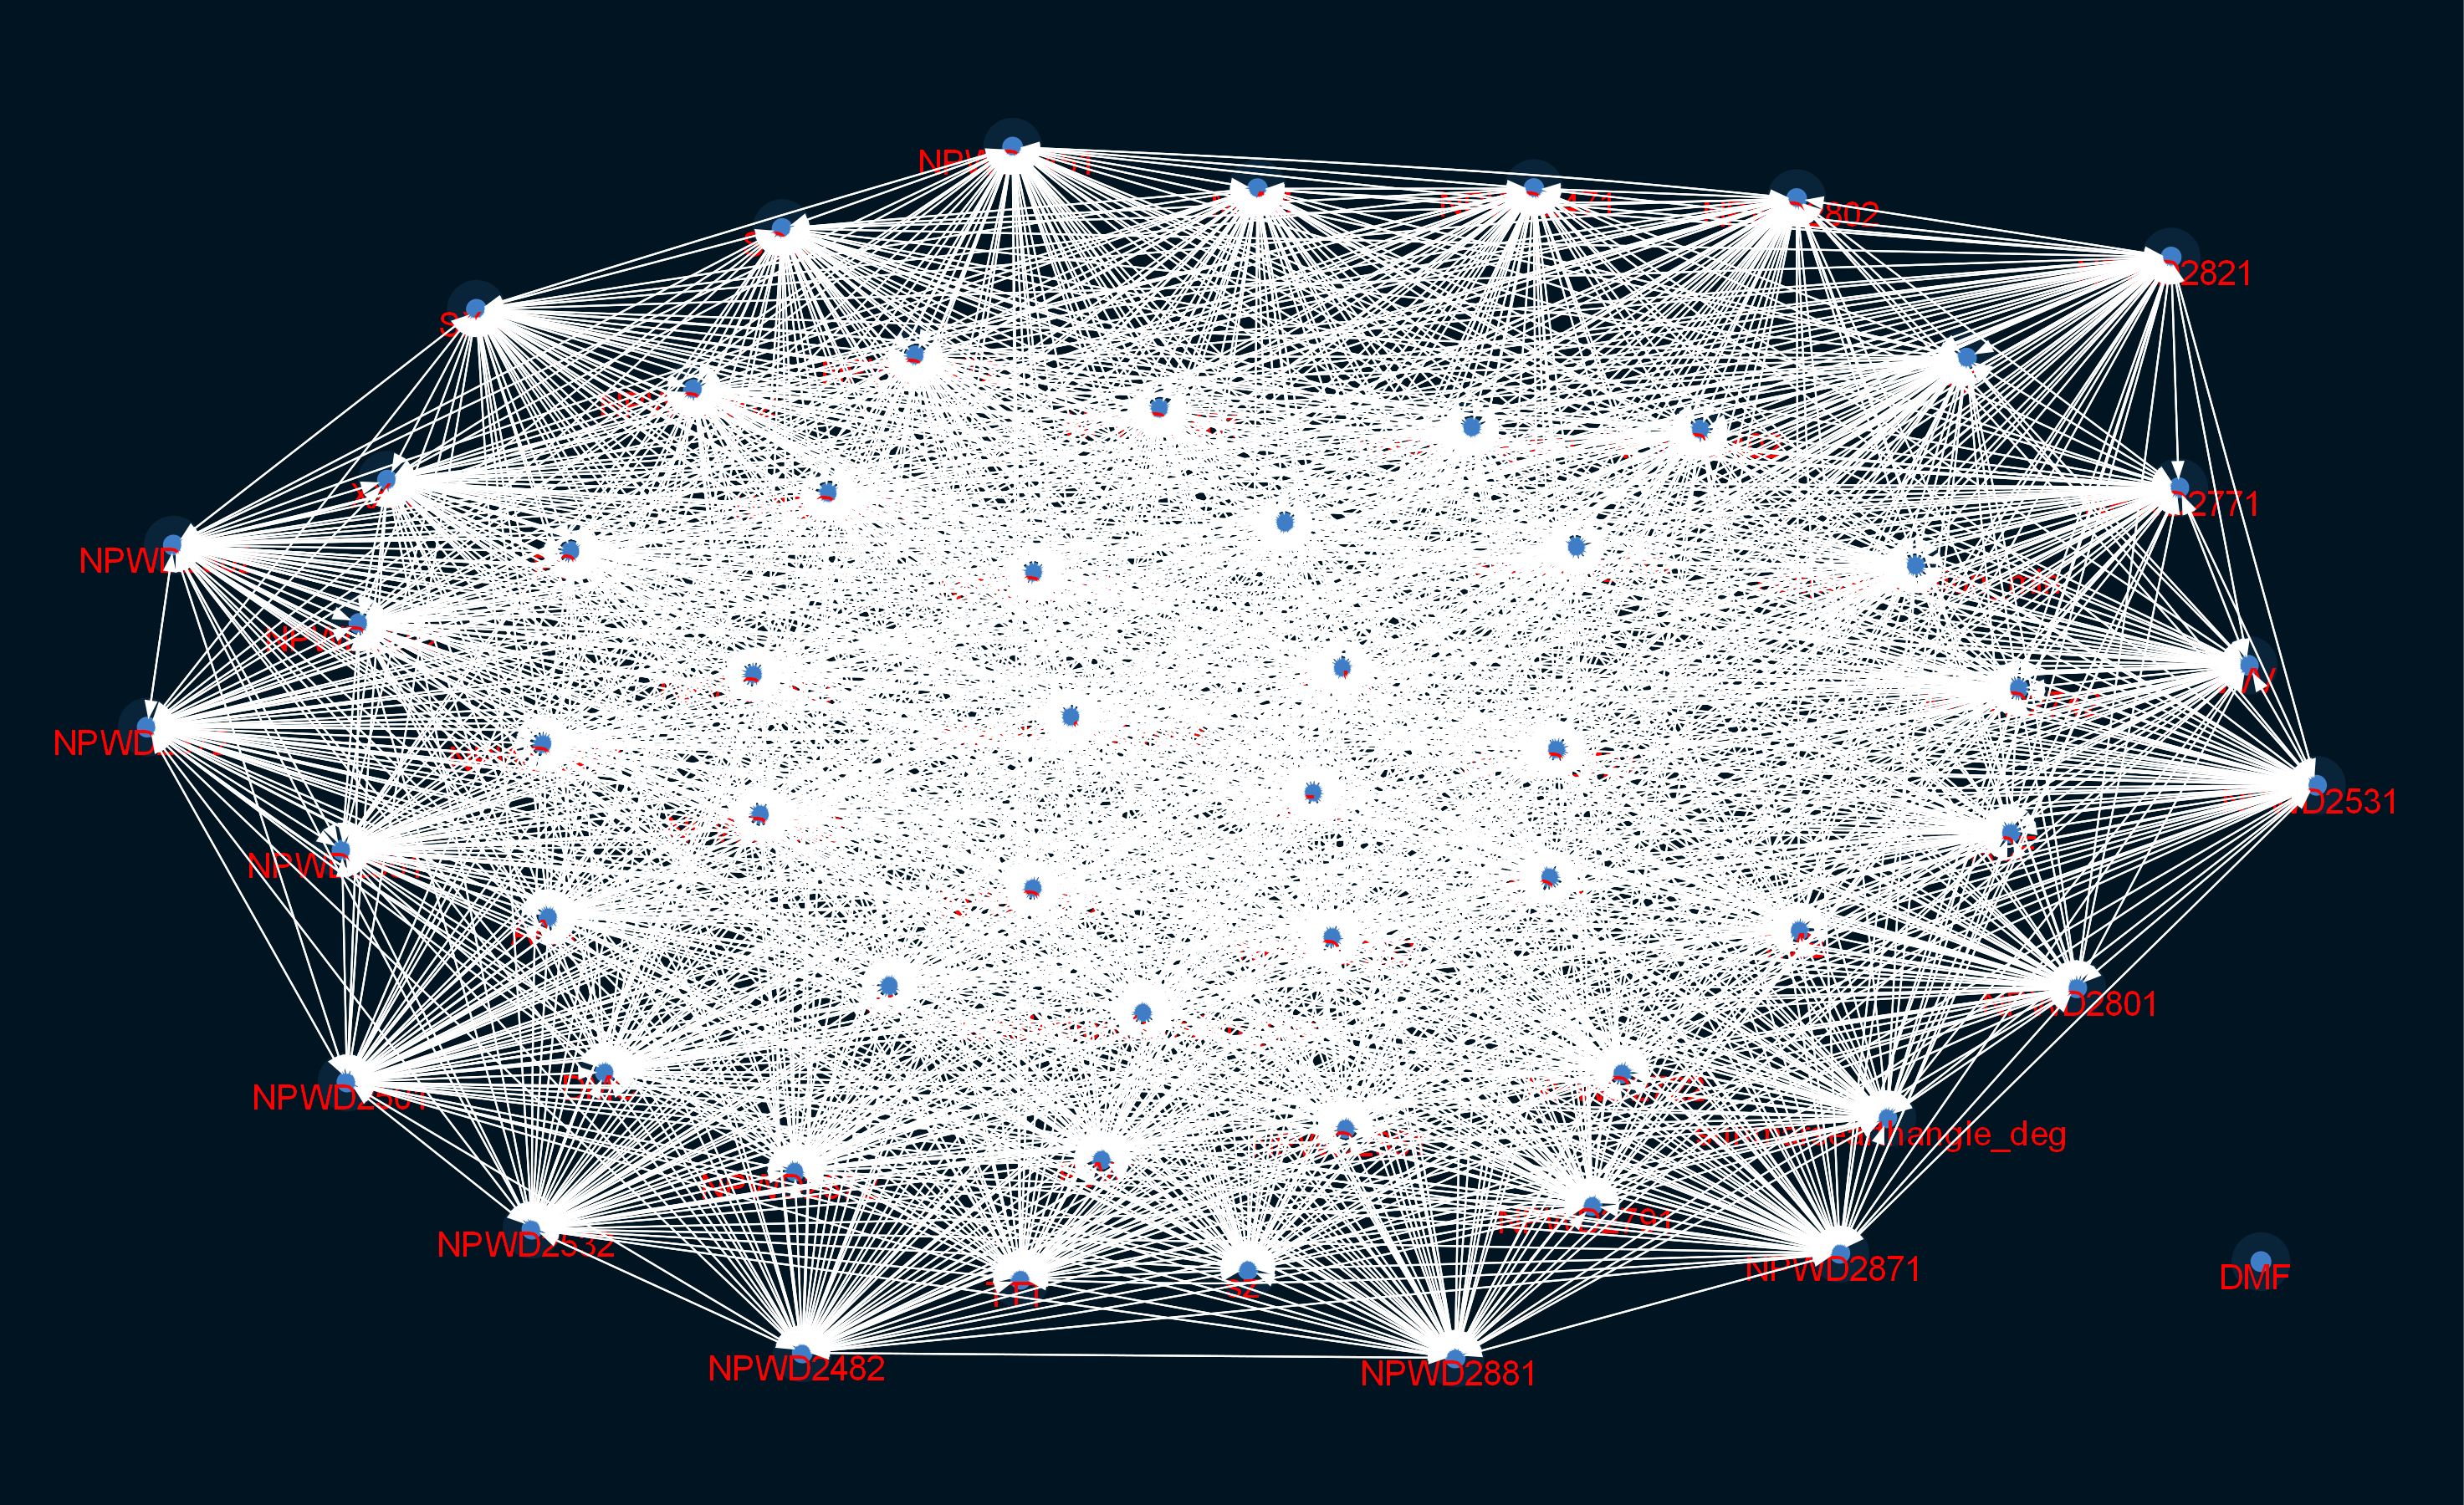

In [6]:


viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [5]:
data = pd.read_csv('preprocess_mars_express/MarsExpressPower/marsexpress_dataset.csv', delimiter=',')



In [6]:
columnstodrop = ["ut_ms"]
for col in data.columns:
    #if "NPWD" in str(col):
     #   columnstodrop.append(col)
     pass
#columnstodrop = columnstodrop[0:-1]
data = data.drop(columns=columnstodrop)

In [21]:
sm = from_pandas(data, max_iter=500)

In [11]:
#Convertimos la matriz de adyancencia del grafo en un dataset. Nos quedamos solo con relaciones de NPWD
edges = []

for u,v  in sm.adj.items():
    for w in v:
        if ("NPWD" in u or "NPWD" in w) and v[w]["weight"] > 0:
            edges.append((u, w, v[w]["weight"]))

df = pd.DataFrame(edges, columns=["source", "target", "weight"])
df.to_csv("graph_NOTEARS_mars_express.csv")
df.head(15)

source    target        weight
0   NPWD2372  NPWD2401  2.812105e-21
1   NPWD2372  NPWD2402  2.789904e-19
2   NPWD2372  NPWD2451  1.504226e-18
3   NPWD2372  NPWD2471  1.173958e-21
4   NPWD2372  NPWD2472  2.821976e-21
5   NPWD2372  NPWD2481  2.267814e-20
6   NPWD2372  NPWD2482  3.267136e-21
7   NPWD2372  NPWD2491  6.481548e-19
8   NPWD2372  NPWD2501  7.605168e-21
9   NPWD2372  NPWD2532  2.316346e-18
10  NPWD2372  NPWD2551  1.894007e-18
11  NPWD2372  NPWD2552  6.338433e-21
12  NPWD2372  NPWD2561  6.505035e-19
13  NPWD2372  NPWD2562  6.510771e-19
14  NPWD2372  NPWD2691  3.683534e-24

In [10]:
df.describe()

weight
count  2.307000e+03
mean   9.972310e-11
std    1.180957e-09
min    1.455402e-26
25%    2.644942e-21
50%    8.329359e-20
75%    3.029732e-18
max    3.897610e-08

C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


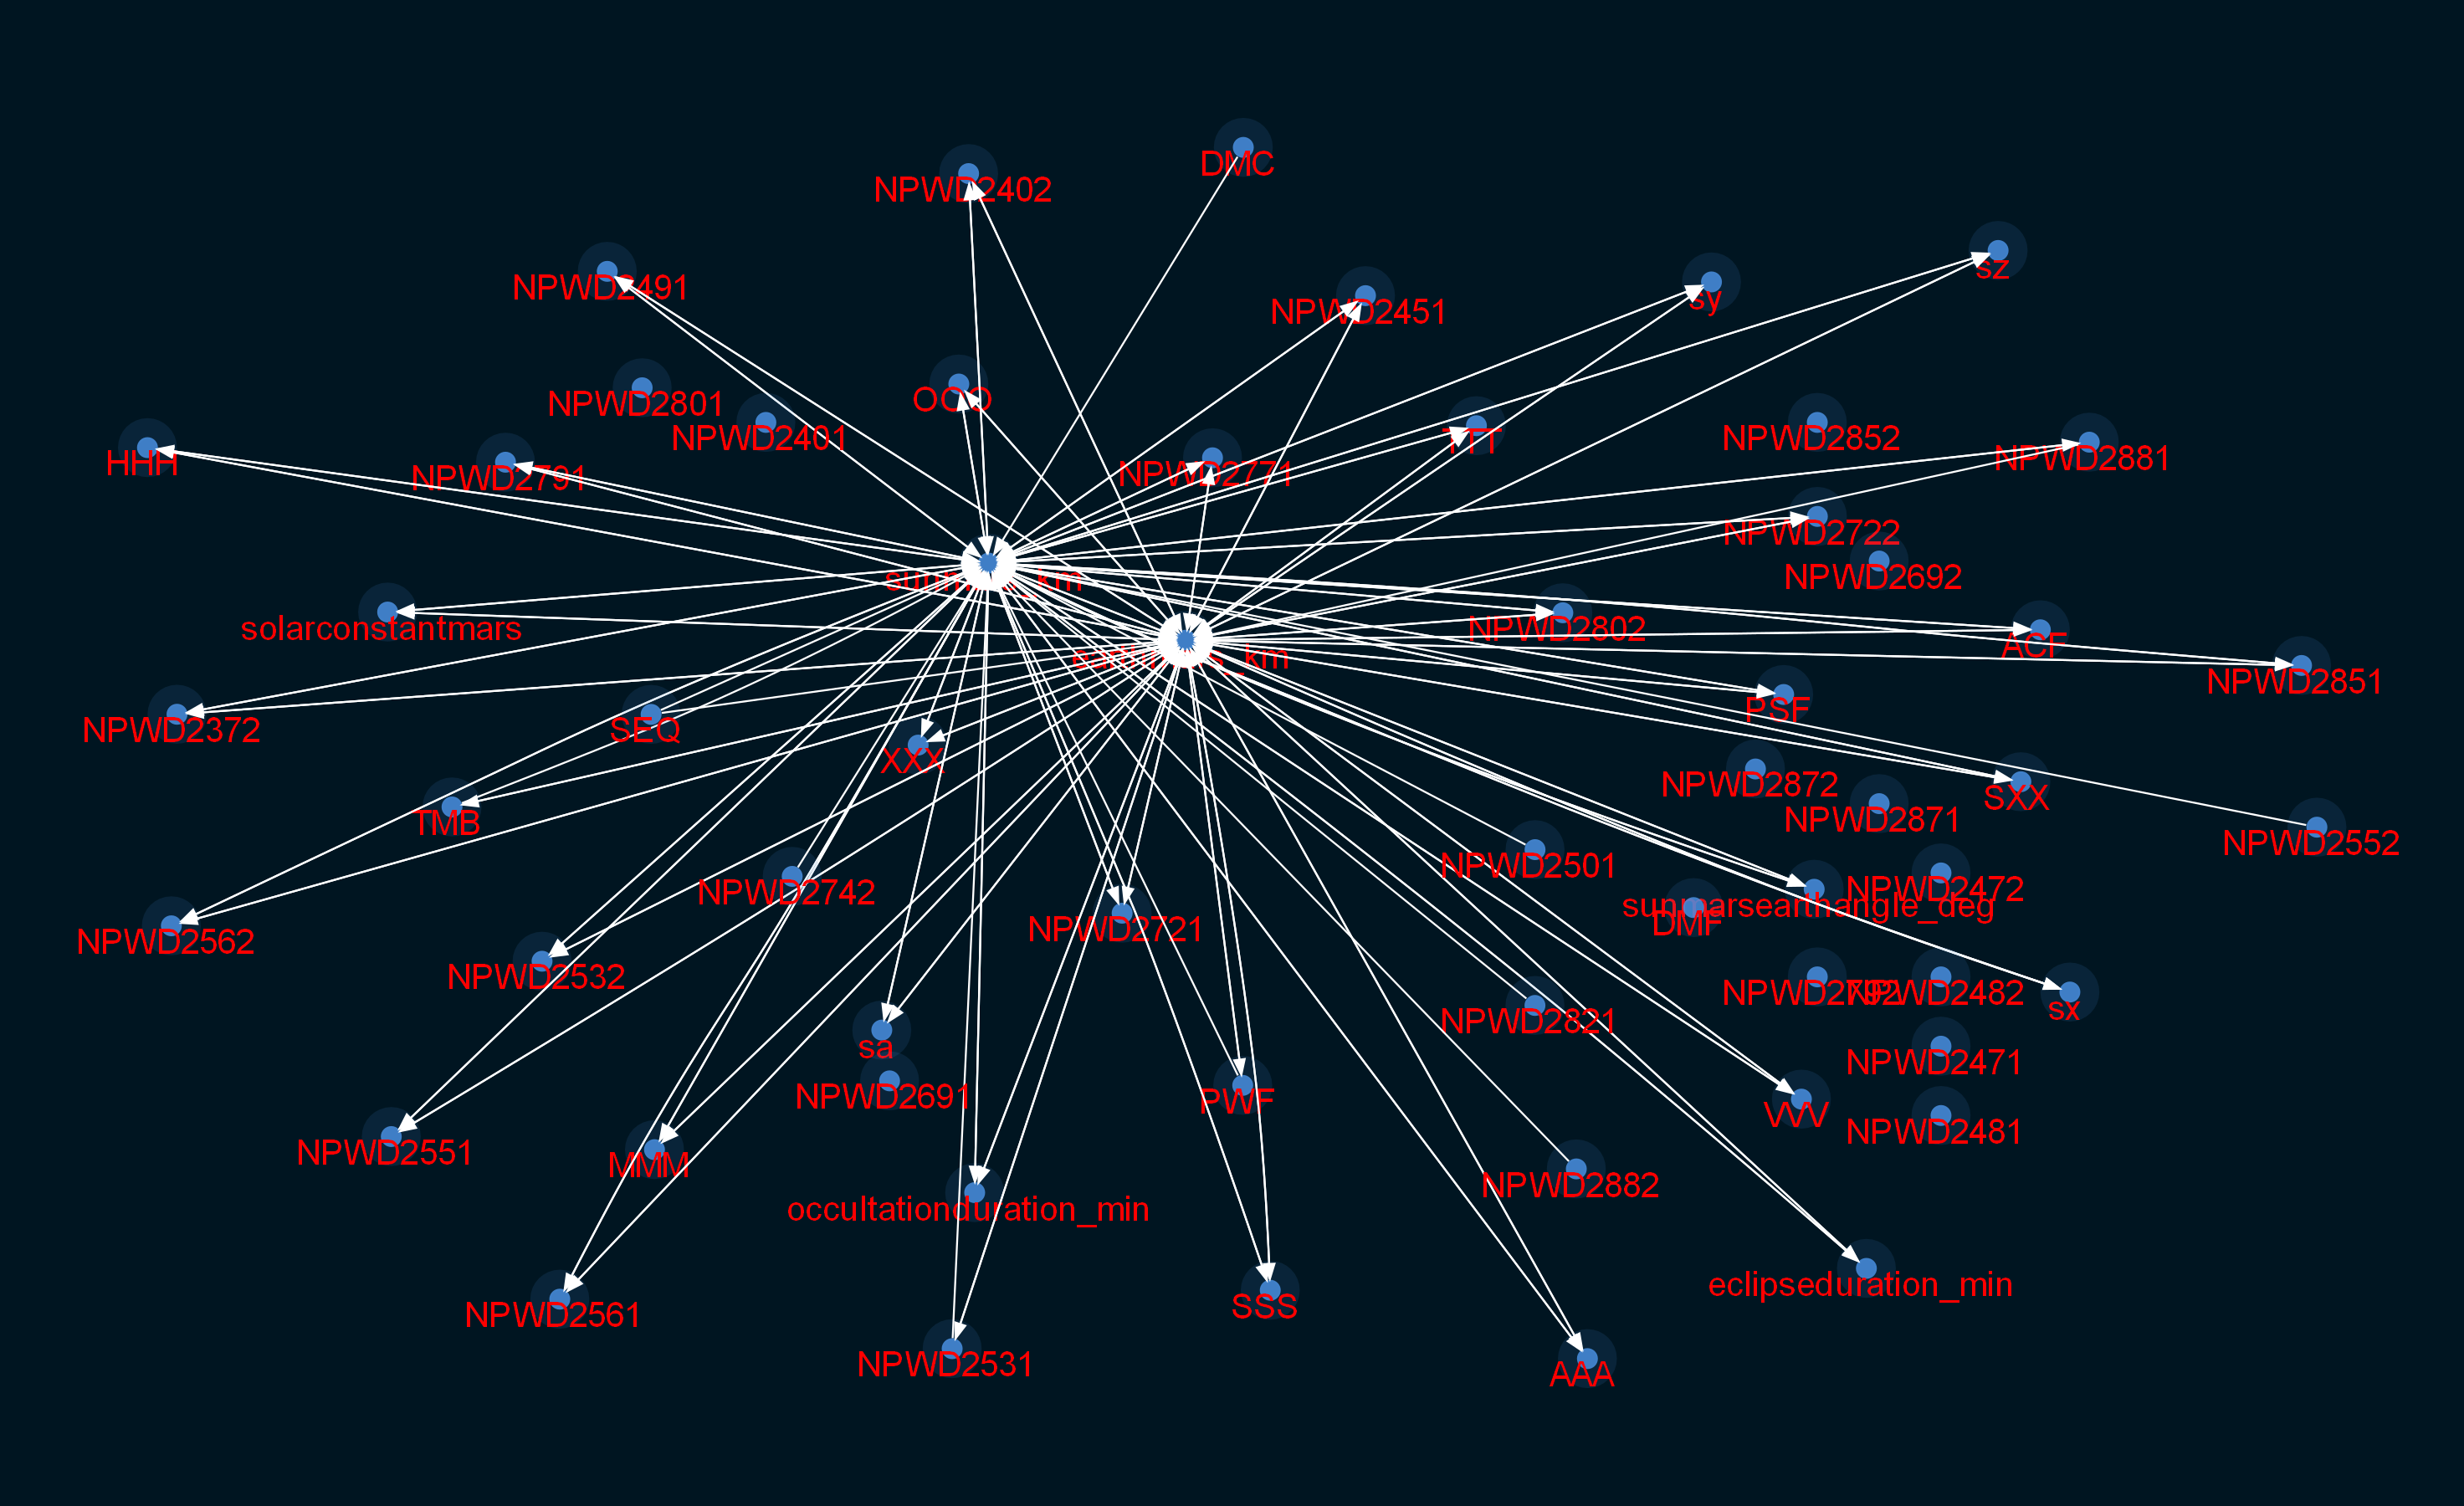

In [15]:
sm.remove_edges_below_threshold(9.972310e-11)
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [16]:
#Convertimos la matriz de adyancencia del grafo en un dataset. Nos quedamos solo con relaciones de NPWD a sunmars_km y earthmars_km
edges = []

for u,v  in sm.adj.items():
    for w in v:
        if ("NPWD" in u and ("sunmars_km" in w or "earthmars_km" in w)) and v[w]["weight"] > 9.972310e-11:
            edges.append((u, w, v[w]["weight"]))

df = pd.DataFrame(edges, columns=["source", "target", "weight"])
df.to_csv("graph_NOTEARS_mars_express.csv")
df.head(15)

source        target        weight
0   NPWD2372    sunmars_km  3.931502e-09
1   NPWD2372  earthmars_km  1.632331e-09
2   NPWD2402    sunmars_km  5.352789e-09
3   NPWD2402  earthmars_km  2.400831e-09
4   NPWD2451    sunmars_km  2.215248e-08
5   NPWD2451  earthmars_km  9.009674e-09
6   NPWD2491    sunmars_km  6.206823e-09
7   NPWD2491  earthmars_km  2.626784e-09
8   NPWD2501    sunmars_km  1.609251e-10
9   NPWD2531    sunmars_km  1.209779e-09
10  NPWD2531  earthmars_km  1.290478e-09
11  NPWD2532    sunmars_km  3.897610e-08
12  NPWD2532  earthmars_km  1.807851e-08
13  NPWD2551    sunmars_km  1.155995e-08
14  NPWD2551  earthmars_km  2.913290e-09

In [17]:
df.describe()

weight
count  3.700000e+01
mean   5.654188e-09
std    7.500798e-09
min    1.029835e-10
25%    1.517341e-09
50%    3.289252e-09
75%    5.747026e-09
max    3.897610e-08

In [38]:

for i, row in df.iterrows():
    sm.remove_edge(row["source"], row["target"])
    

In [37]:
sm = from_pandas(data, max_iter=500)

C:\ProgramData\Anaconda3\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pygraphviz\agraph.py:1400: RuntimeWarning: Warning: node 'NPWD2372', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


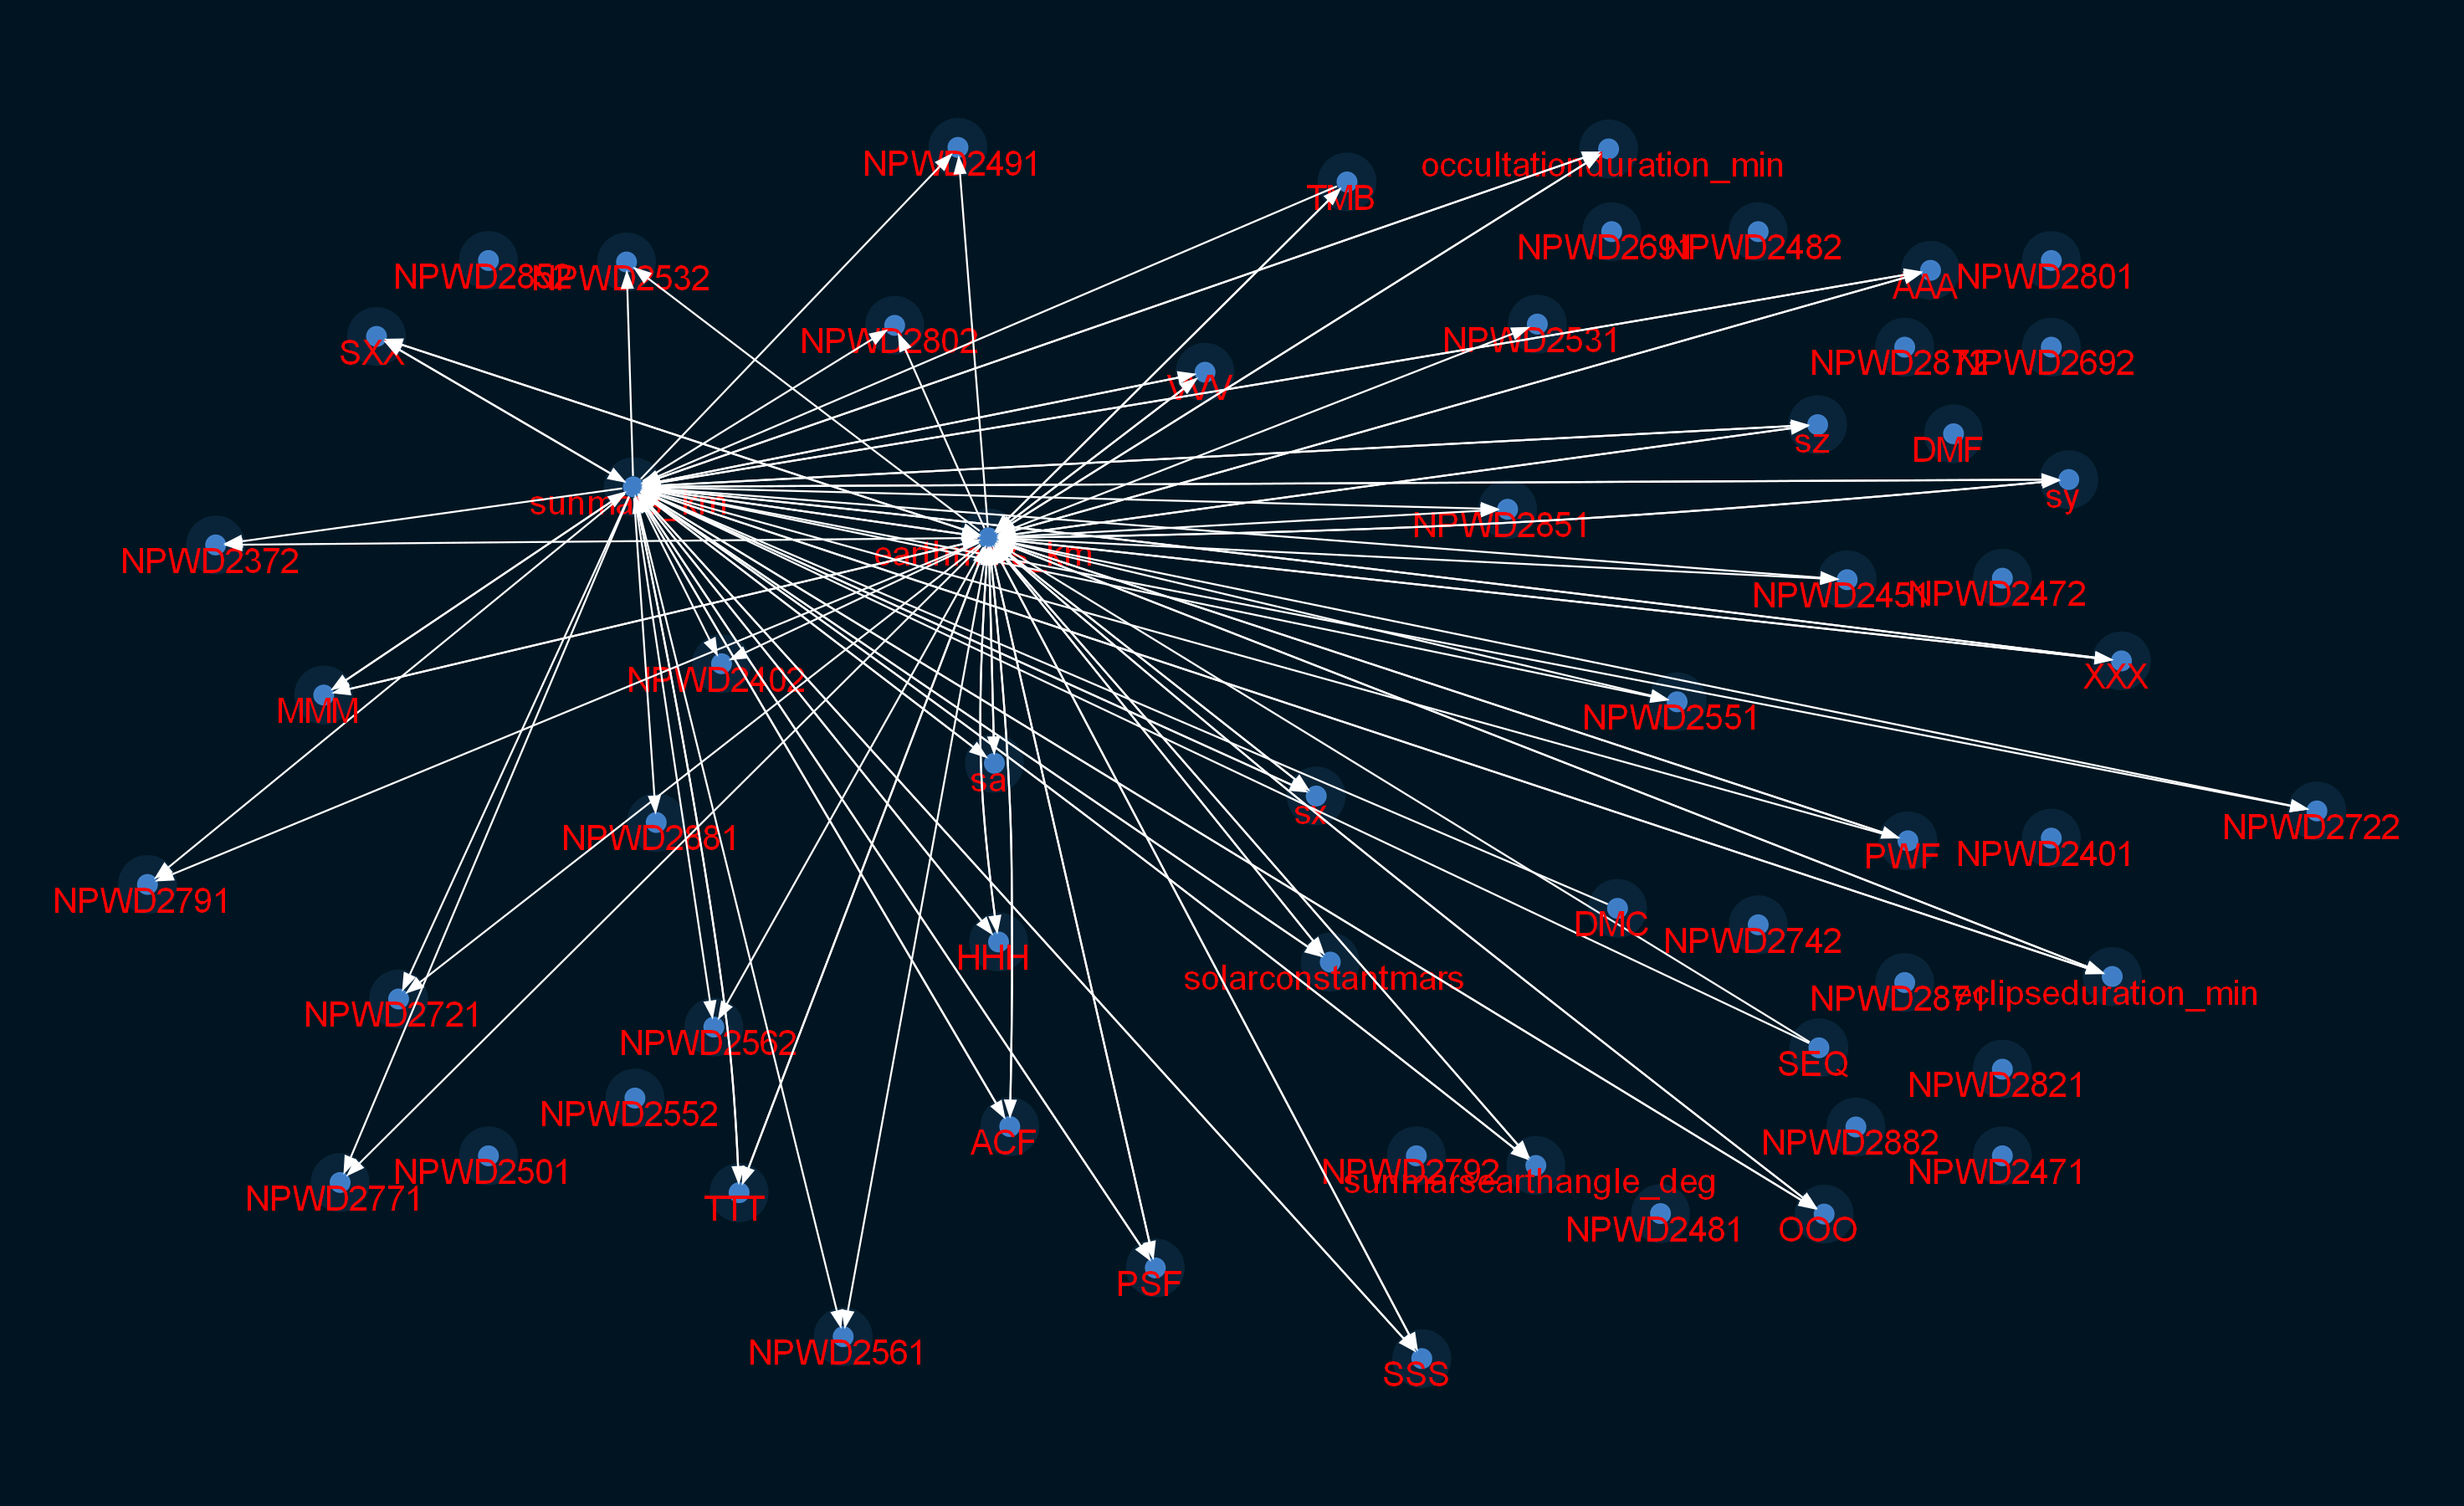

In [39]:
sm.remove_edges_below_threshold(9.972310e-11)
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [ ]:
sm2 = sm.copy()
sm2.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm2,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [ ]:
#sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)

In [ ]:
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

### Modifying the Structure

To correct erroneous relationships, we can incorporate domain knowledge into the model after structure learning. We can modify the structure model through adding and deleting the edges. For example, we can add and remove edges as:

We can now visualise our updated structure to confirm it looks reasonable.

We can see there are two separate subgraphs here in the visualisation plot: Dalc->Walc and the other big subgraph. We can retrieve the largest subgraph easily by calling the StructureModel function get_largest_subgraph().

In [ ]:
sm3 = sm.get_largest_subgraph()
viz = plot_structure(
    sm3,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [62]:
sm.adj

AdjacencyView({'sunmars_km': {'sx': {'origin': 'learned', 'weight': 1.0658113986124466e-07}, 'sy': {'origin': 'learned', 'weight': 2.636294423402688e-07}, 'sz': {'origin': 'learned', 'weight': 3.548844574849319e-07}, 'earthmars_km': {'origin': 'learned', 'weight': 1.085002860942038}, 'sunmarsearthangle_deg': {'origin': 'learned', 'weight': 1.0886161752489699e-07}, 'solarconstantmars': {'origin': 'learned', 'weight': 1.3078516041628766e-06}}, 'sunmarsearthangle_deg': {'sunmars_km': {'origin': 'learned', 'weight': 7.434864600657768e-07}, 'earthmars_km': {'origin': 'learned', 'weight': 1.7948574002524649e-07}}, 'solarconstantmars': {'sunmars_km': {'origin': 'learned', 'weight': 1.742341497754142e-05}, 'earthmars_km': {'origin': 'learned', 'weight': 9.406414415223915e-06}}, 'sa': {'sunmars_km': {'origin': 'learned', 'weight': 1.8574105310818355e-07}}, 'sy': {'sunmars_km': {'origin': 'learned', 'weight': 2.7363509046792048e-06}, 'earthmars_km': {'origin': 'learned', 'weight': 1.233721230952

In [82]:

sm.remove_edge("sa", "sunmars_km")
sm.remove_edge("sx", "sunmars_km")
sm.remove_edge("sy", "sunmars_km")
sm.remove_edge("sz", "sunmars_km" )
sm.remove_edge("eclipseduration_min", "sunmars_km")
sm.remove_edge("earthmars_km", "sunmars_km" )
sm.remove_edge("solarconstantmars", "sunmars_km")
sm.remove_edge("occultationduration_min", "sunmars_km")
sm.remove_edge("sunmarsearthangle_deg", "sunmars_km")

In [ ]:

sm.remove_edge("sa", "earthmars_km")
sm.remove_edge("sx", "earthmars_km")
sm.remove_edge("sy", "earthmars_km")
sm.remove_edge("sz", "earthmars_km" )
sm.remove_edge("eclipseduration_min", "earthmars_km")
sm.remove_edge("sunmars_km", "earthmars_km" )
sm.remove_edge("solarconstantmars", "earthmars_km")
sm.remove_edge("occultationduration_min", "earthmars_km")
sm.remove_edge("sunmarsearthangle_deg", "earthmars_km")


In [ ]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))

In [96]:

sm.add_edge("earthmars_km", "sunmarsearthangle_deg", origin="expert")

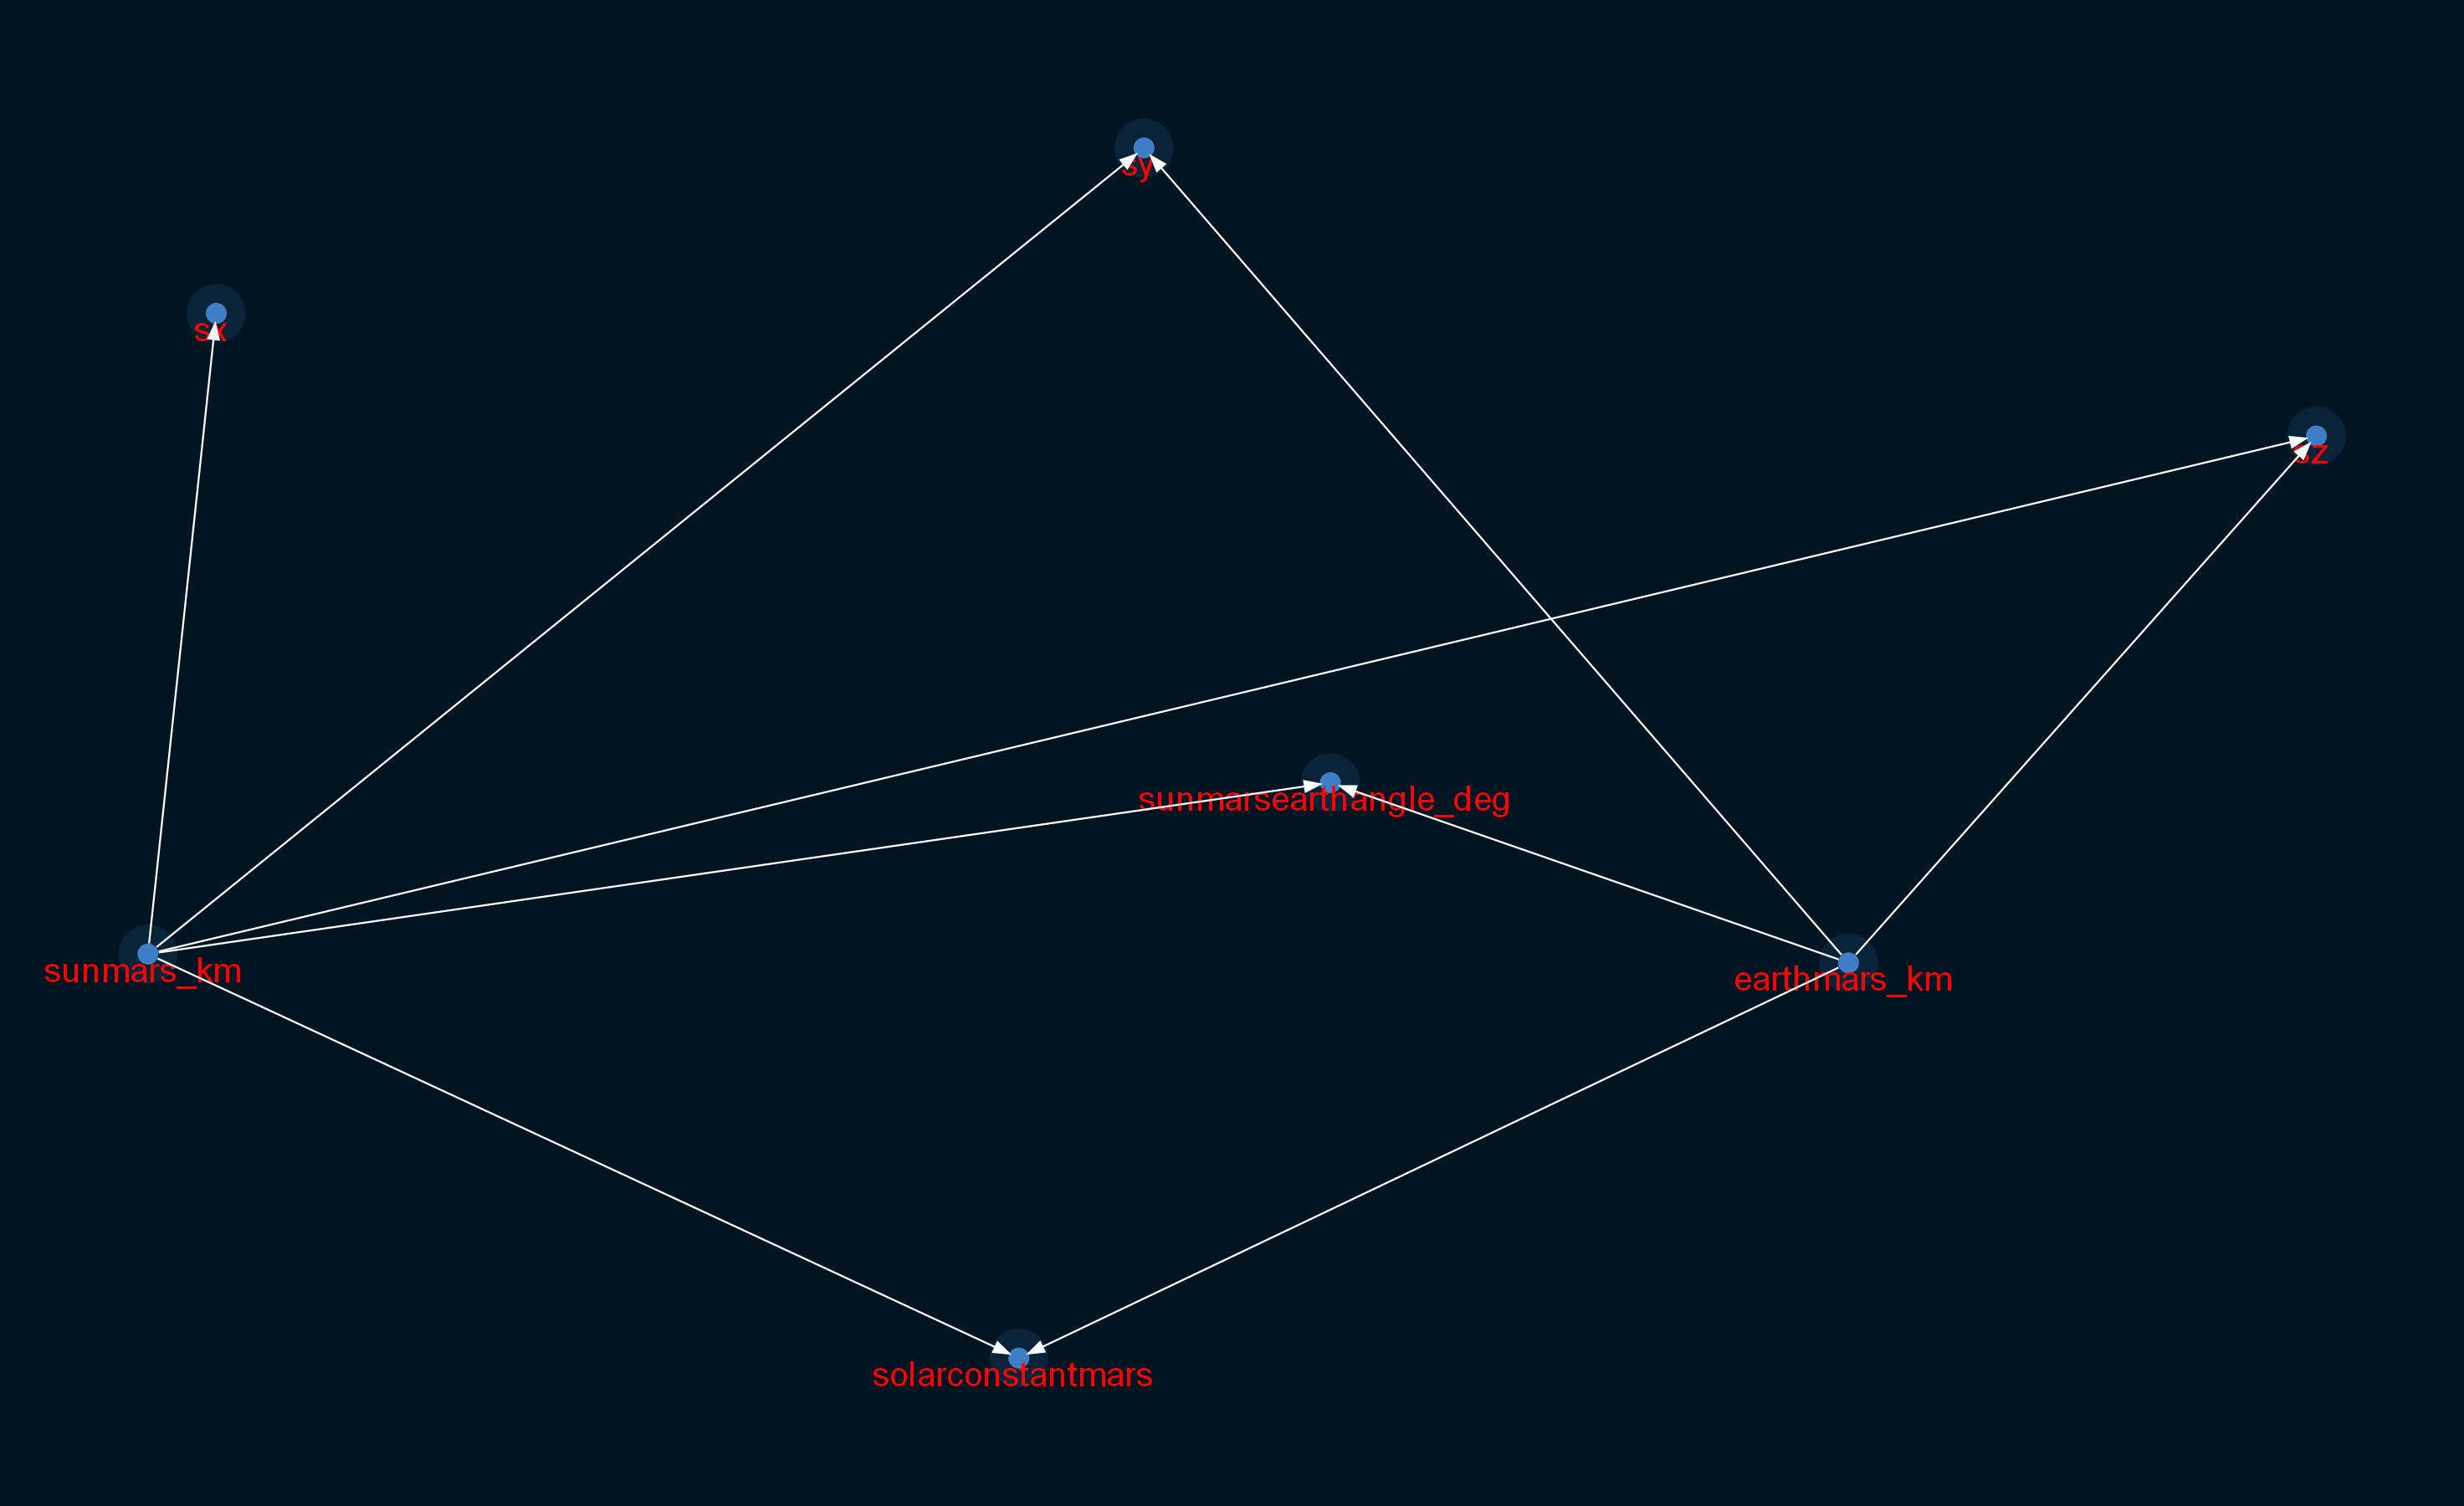

In [97]:
sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
    prog='fdp',
)
Image(viz.draw(format='png'))